In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_approval_dataset.mini.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [3]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
print(df.columns)
print(df[' self_employed'].unique())
print(df[' education'].unique())
print(df[' loan_status'].unique())


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
[' No' ' Yes']
[' Graduate' ' Not Graduate']
[' Approved' ' Rejected']


In [5]:
df.replace({" self_employed": {" No": 0, " Yes": 1}}, inplace=True)

df.replace({" education": {" Not Graduate": 0, " Graduate": 1}}, inplace=True)

df.replace({" loan_status": {" Approved": 0, " Rejected": 1}}, inplace=True)


df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


# DATA VISUALISATIION

<Axes: xlabel=' education', ylabel='count'>

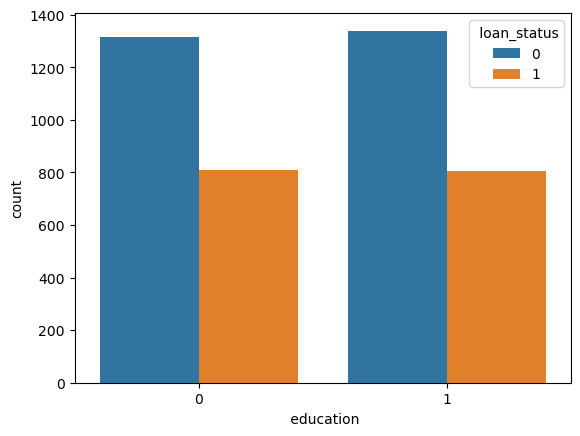

In [6]:
#education and loan status
sns.countplot(x=" education", hue=" loan_status",data=df)

In [7]:
X = df.drop([" loan_status","loan_id"], axis=1)
y = df[" loan_status"]

In [8]:

#separate the dataset into train and test so that it can prevent the overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
X_train.shape,X_test.shape

((2988, 11), (1281, 11))

# FEATURE SELECTION

1) CORRELATION COEFFICIENT ->The logic behind using correlation for feature selection is that good variables correlate highly with the target. ->If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here.

In [10]:
corr_df=X_train.corr()
corr_df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
no_of_dependents,1.000000,-0.010196,0.007422,0.000256,-0.007731,-0.012531,-0.008442,-0.006673,-0.004101,-0.006367,0.005316
education,-0.010196,1.000000,-0.015505,0.013002,0.011665,-0.008671,-0.003754,0.015495,0.005898,0.015413,0.010710
self_employed,0.007422,-0.015505,1.000000,0.002045,-0.000249,-0.003858,-0.004163,0.006839,-0.015673,0.002447,-0.005404
income_annum,0.000256,0.013002,0.002045,1.000000,0.928383,0.017354,-0.036682,0.634352,0.633718,0.928056,0.849639
loan_amount,-0.007731,0.011665,-0.000249,0.928383,1.000000,0.018343,-0.026847,0.588828,0.590508,0.858396,0.782245
loan_term,-0.012531,-0.008671,-0.003858,0.017354,0.018343,1.000000,0.008453,0.009412,0.000632,0.017262,0.020203
cibil_score,-0.008442,-0.003754,-0.004163,-0.036682,-0.026847,0.008453,1.000000,-0.043259,-0.006271,-0.037326,-0.018143
residential_assets_value,-0.006673,0.015495,0.006839,0.634352,0.588828,0.009412,-0.043259,1.000000,0.402003,0.580027,0.533244
commercial_assets_value,-0.004101,0.005898,-0.015673,0.633718,0.590508,0.000632,-0.006271,0.402003,1.000000,0.577120,0.550251
luxury_assets_value,-0.006367,0.015413,0.002447,0.928056,0.858396,0.017262,-0.037326,0.580027,0.577120,1.000000,0.788922


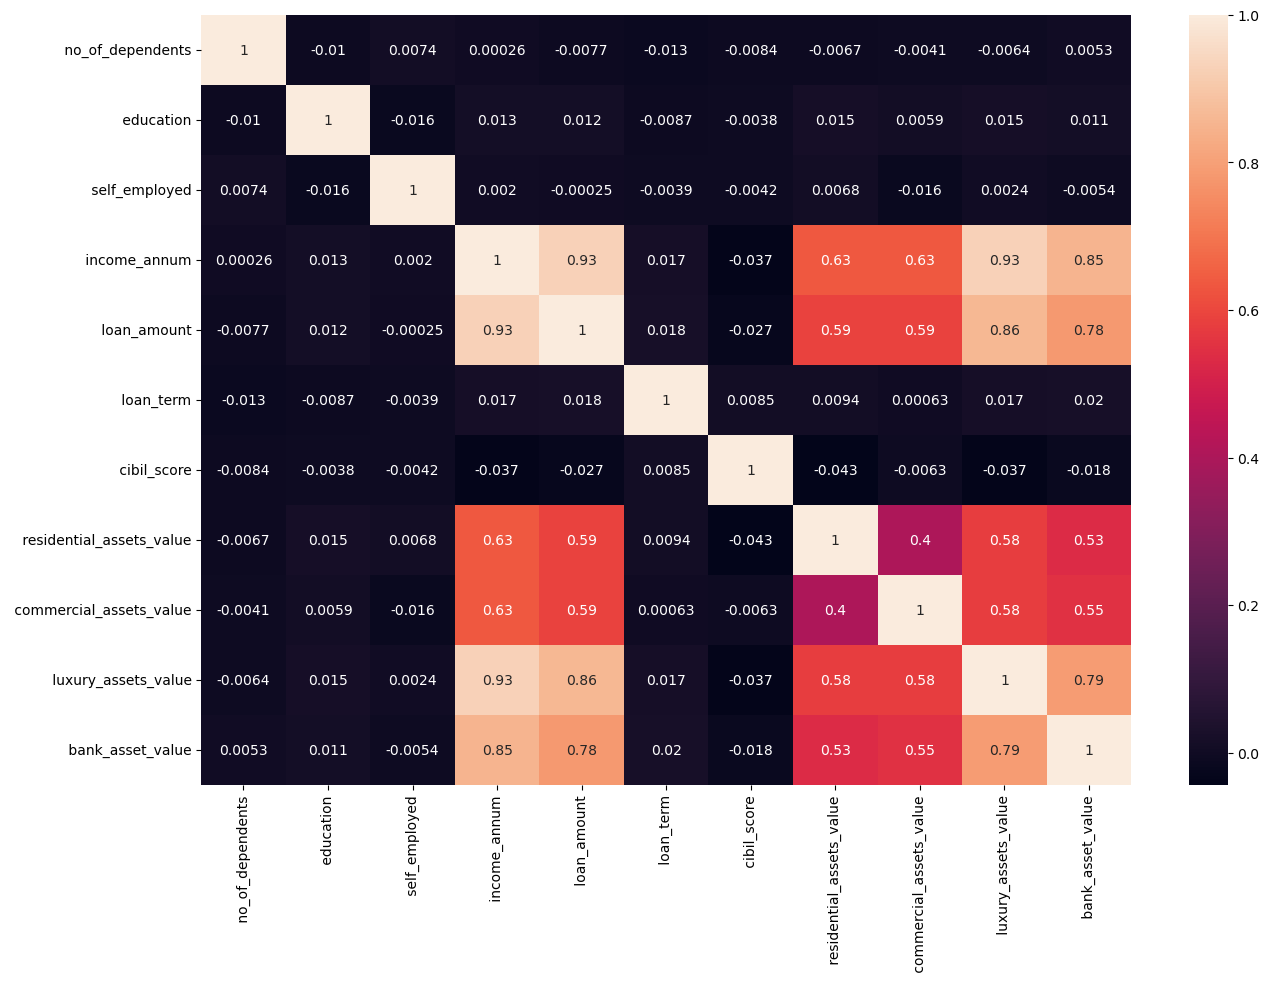

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_df,annot=True)
plt.show()

In [12]:
#create a function of correlation--with this we can select highly correlated features
#it will remove the first feature that is correlated with any other feature


#traverse thru all the columns of the matrix, then we'll compare each and every col and check if the value is greater than the threshold value
#generally, threshold is used as 80-85%
def correlation(dataset, threshold):
    col_corr=set()     #set of all the names of correlated columns, so that duplicate entries will not go with respect to the columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:  #The threshold parameter determines the correlation coefficient value above which features are considered correlated.
                colname=corr_matrix.columns[i]   #getting the name of the column
                col_corr.add(colname)
    return col_corr
    

In [13]:
corr_features=correlation(X_train,0.85)     #to avoid overfitting, performing this on x_train rather than x_test
len(set(corr_features))

2

In [14]:
corr_features

{' loan_amount', ' luxury_assets_value'}

In [15]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [16]:
#When features are highly correlated, it means that they provide redundant information, and keeping both may not necessarily improve the performance of your model. 

column_to_drop = ' luxury_assets_value'

X_train.drop(column_to_drop, axis=1,inplace=True)
X_test.drop(column_to_drop, axis=1,inplace=True)

In [17]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,bank_asset_value
3404,4,0,0,2800000,8300000,14,381,3200000,1100000,1500000
781,3,0,1,9900000,20400000,4,865,26300000,3600000,12800000
3002,4,1,1,3500000,10700000,8,883,200000,2300000,2000000
4047,3,0,0,6400000,23000000,8,520,12100000,11400000,3800000
3391,2,1,1,3300000,6700000,8,845,1300000,4600000,3200000
...,...,...,...,...,...,...,...,...,...,...
3444,0,1,1,1300000,4700000,16,530,3200000,1000000,800000
466,5,0,1,500000,1800000,18,411,1000000,500000,200000
3092,4,0,1,8600000,20600000,16,449,10800000,10600000,5400000
3772,2,0,1,7000000,21400000,12,541,3700000,1300000,9600000


# Using Ensemble Method for the feature selection process using the above filtered X_train

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_names = X_train.columns

#dataframe to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# to sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                     Feature  Importance
6                cibil_score    0.828466
5                  loan_term    0.059040
4                loan_amount    0.028678
3               income_annum    0.019529
7   residential_assets_value    0.018138
9           bank_asset_value    0.017222
8    commercial_assets_value    0.016828
0           no_of_dependents    0.007086
2              self_employed    0.002576
1                  education    0.002437


In [19]:
# Select only the important features based on the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.01]['Feature']

# Create a new DataFrame with only the selected features
X_train_selected = X_train[selected_features]

# Print or use the selected features
print("Selected Features:")
print(selected_features)

# Use X_train_selected for further analysis or model training


Selected Features:
6                  cibil_score
5                    loan_term
4                  loan_amount
3                 income_annum
7     residential_assets_value
9             bank_asset_value
8      commercial_assets_value
Name: Feature, dtype: object


In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_train_selected, y_train, test_size=0.2,random_state=42)

X_train_selected

,cibil_score,loan_term,loan_amount,income_annum,residential_assets_value,bank_asset_value,commercial_assets_value
2841,664,6,30900000,8500000,5700000,7400000,9900000
2455,476,6,19700000,8400000,24700000,12100000,16500000
1986,876,6,500000,300000,300000,300000,100000
1698,866,4,18900000,4800000,10200000,5900000,6000000
1585,473,10,30500000,8300000,13300000,11800000,9400000
...,...,...,...,...,...,...,...
1394,739,12,21600000,7000000,1600000,8400000,7600000
2241,779,8,3800000,1100000,600000,1600000,1800000
71,386,4,18600000,5300000,2700000,4200000,9700000
1199,383,2,600000,300000,600000,400000,300000


# LINEAR REGRESSION

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train_selected, y_train)
y_pred=lin_reg.predict(X_test_selected)
from sklearn.metrics import mean_squared_error, mean_absolute_error
error=np.sqrt(mean_squared_error(y_test,y_pred))
error

0.30269970280228664

In [22]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.24516016723921188

# LOGISTIC REGRESSION

In [23]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train_selected, y_train)
#making predictions
y_pred=log_reg.predict(X_test_selected)

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.7424749163879598


# Ensemble Method: RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_classifier.fit(X_train_selected, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: ", accuracy)

Accuracy Score:  0.9849498327759197


# BAGGING cLASSifier

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Initialize a base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)
# Initialize a BaggingClassifier
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Train the BaggingClassifier
bagging_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = bagging_model.predict(X_test_selected)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9849


# prediction

In [27]:
input_data=(417,8,12200000,4100000,2700000,3300000,2200000)

#changing the input_data to the numpy array as the processing is faster and easy than list
input_data_as_numpy=np.asarray(input_data)

#reshape the array as predicting for the particular instance
input_data_reshaped=input_data_as_numpy.reshape(1,-1)  #1 as there is one instance

prediction=rf_classifier.predict(input_data_reshaped)
print(prediction)
    
if(prediction[0]==1):           #prediction[0]->first element of the list
    print("Loan is approved")
else:
    print("Loan is not approved")

[1]
Loan is approved


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# UI using tkinter

In [ ]:
import tkinter as tk
from tkinter import Label, Button, Entry
import numpy as np

# Assuming `rf_classifier` is your trained random forest classifier

def predict_loan_approval():
    # Get user input from Entry widgets
    cibil_score = float(cibil_score_entry.get())
    loan_term = float(loan_term_entry.get())
    loan_amount = float(loan_amount_entry.get())
    income_annum = float(income_annum_entry.get())
    residential_assets_value = float(residential_assets_value_entry.get())
    bank_asset_value = float(bank_asset_value_entry.get())
    commercial_assets_value = float(commercial_assets_value_entry.get())

    # Create input data as a numpy array
    input_data = np.asarray((cibil_score, loan_term, loan_amount, income_annum,
                             residential_assets_value, bank_asset_value, commercial_assets_value))

    # Reshape the array for prediction
    input_data_reshaped = input_data.reshape(1, -1)

    # Make prediction
    prediction = rf_classifier.predict(input_data_reshaped)

    # Update result_label based on the prediction
    if prediction[0] == 1:
        result_label.config(text="Loan is approved", fg="green")
    else:
        result_label.config(text="Loan is not approved", fg="red")

# Create main application window
app = tk.Tk()
app.title("Loan Approval Predictor")

# Create and place Entry widgets for user input
cibil_score_label = Label(app, text="CIBIL Score:")
cibil_score_label.grid(row=0, column=0)
cibil_score_entry = Entry(app)
cibil_score_entry.grid(row=0, column=1)

loan_term_label = Label(app, text="Loan Term:")
loan_term_label.grid(row=1, column=0)
loan_term_entry = Entry(app)
loan_term_entry.grid(row=1, column=1)

loan_amount_label = Label(app, text="Loan Amount:")
loan_amount_label.grid(row=2, column=0)
loan_amount_entry = Entry(app)
loan_amount_entry.grid(row=2, column=1)

income_annum_label = Label(app, text="Income Annually:")
income_annum_label.grid(row=3, column=0)
income_annum_entry = Entry(app)
income_annum_entry.grid(row=3, column=1)

residential_assets_value_label = Label(app, text="Residential Assets Value:")
residential_assets_value_label.grid(row=4, column=0)
residential_assets_value_entry = Entry(app)
residential_assets_value_entry.grid(row=4, column=1)

bank_asset_value_label = Label(app, text="Bank Asset Value:")
bank_asset_value_label.grid(row=5, column=0)
bank_asset_value_entry = Entry(app)
bank_asset_value_entry.grid(row=5, column=1)

commercial_assets_value_label = Label(app, text="Commercial Assets Value:")
commercial_assets_value_label.grid(row=6, column=0)
commercial_assets_value_entry = Entry(app)
commercial_assets_value_entry.grid(row=6, column=1)

# Create and place Button widget for prediction
predict_button = Button(app, text="Predict", command=predict_loan_approval)
predict_button.grid(row=7, column=0, columnspan=2)

# Create and place Label widget for displaying the result
result_label = Label(app, text="", font=("Helvetica", 14))
result_label.grid(row=8, column=0, columnspan=2)

# Start the application main loop
app.mainloop()


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# UI using gradio

In [32]:
import gradio as gr
import numpy as np

# Assuming `rf_classifier` is your trained random forest classifier

# Function to make predictions
def predict_loan_approval(cibil_score, loan_term, loan_amount, income_annum, residential_assets_value,
                           bank_asset_value, commercial_assets_value):
    # Create input data as a numpy array
    input_data = np.asarray([cibil_score, loan_term, loan_amount, income_annum,
                             residential_assets_value, bank_asset_value, commercial_assets_value])

    # Reshape the array for prediction
    input_data_reshaped = input_data.reshape(1, -1)

    # Make prediction
    prediction = rf_classifier.predict(input_data_reshaped)

    # Return the prediction result
    return "Loan is approved" if prediction[0] == 1 else "Loan is not approved"

# Define input components for Gradio UI
input_components = [
    gr.Textbox("number", label="CIBIL Score"),
    gr.Textbox("number", label="Loan Term"),
    gr.Textbox("number", label="Loan Amount"),
    gr.Textbox("number", label="Income Annually"),
    gr.Textbox("number", label="Residential Assets Value"),
    gr.Textbox("number", label="Bank Asset Value"),
    gr.Textbox("number", label="Commercial Assets Value")
]

# Create Gradio interface
iface = gr.Interface(
    fn=predict_loan_approval,
    inputs=input_components,
    outputs="text"
)

# Launch the Gradio interface
iface.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
